In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
import math
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline

In [19]:
df = pd.read_csv("https://raw.githubusercontent.com/abdulrahim200/AIProjectfile/main/train13519.csv")
df.head()

,timestamp,hourly_traffic_count
0,2015-10-04 00:00:00,3
1,2015-10-04 00:05:00,12
2,2015-10-04 00:10:00,4
3,2015-10-04 00:15:00,9
4,2015-10-04 00:20:00,5


In [20]:
df1 = df.reset_index()['hourly_traffic_count']
df1.head()

,hourly_traffic_count
0,3
1,12
2,4
3,9
4,5


In [21]:
df1 = df1.iloc[:9792,]
df1.tail()

,hourly_traffic_count
9787,12
9788,20
9789,16
9790,14
9791,17


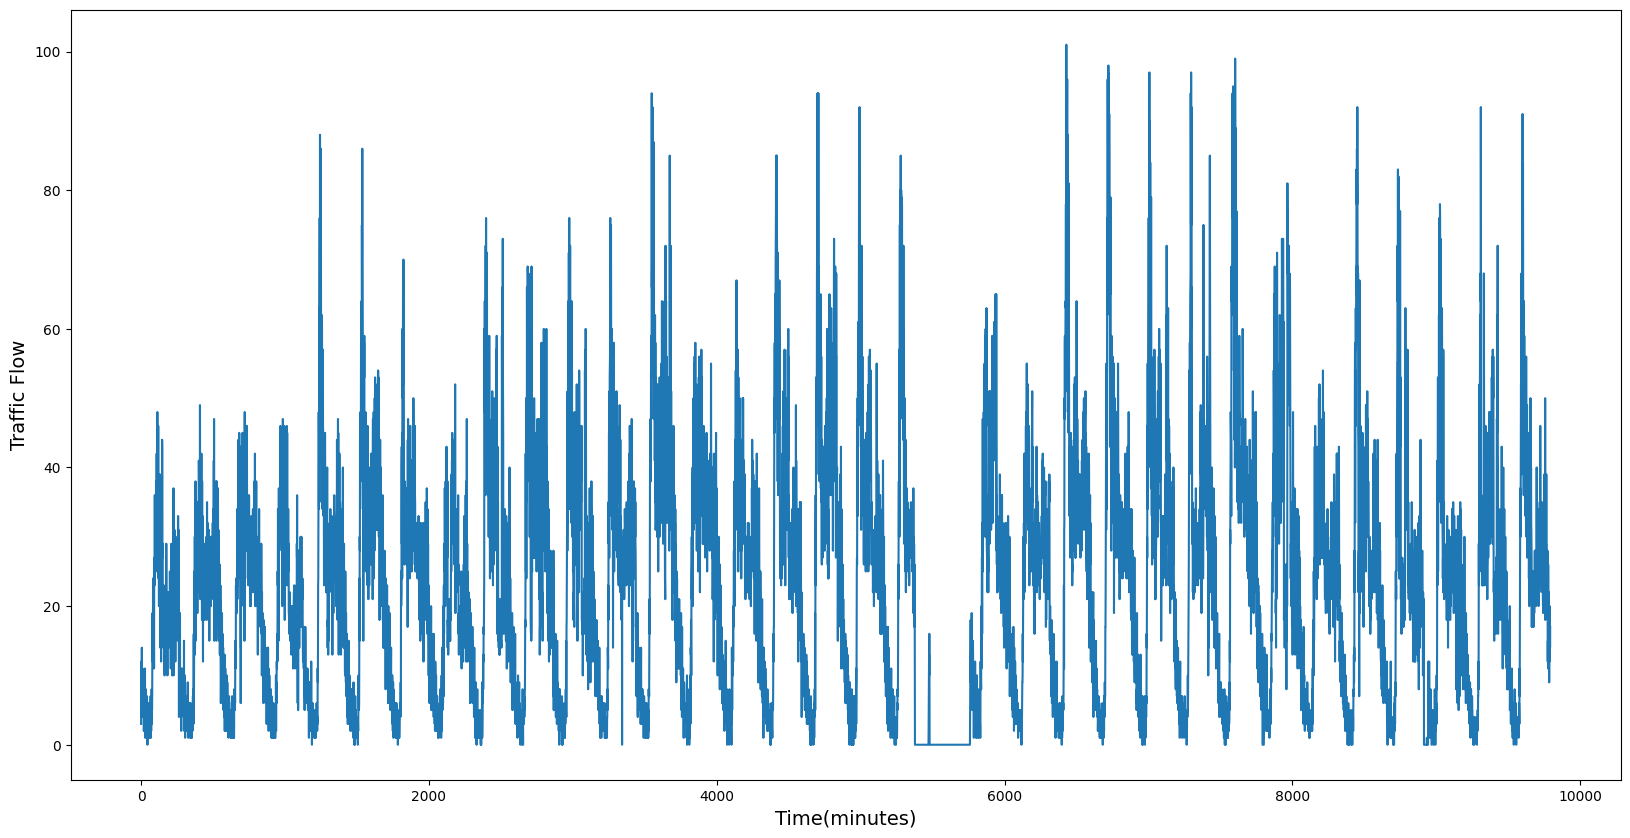

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(df1)

# Add x and y axis labels
plt.xlabel('Time(minutes)', fontsize=14)  # Label for the x-axis
plt.ylabel('Traffic Flow', fontsize=14)  # Label for the y-axis

# Show the plot
plt.show()


In [24]:
def create_dataset(dataset, window=1):
    dataX, dataY= [], []
    for i in range(len(dataset)-window-1):
        a = dataset[i:(i+window),0]
        dataX.append(a)
        dataY.append(dataset[i+window,0])
    return np.array(dataX), np.array(dataY)

In [25]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [26]:
training_size = int(len(df1)*0.80)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [27]:
window = 250
X_train,y_train = create_dataset(train_data,window)
X_test, y_test = create_dataset(test_data,window)

# LSTM(Long Short-Term Memory) Neural Network Model


Long Short-Term Memory networks (LSTMs) are a type of recurrent neural network (RNN) designed specifically to handle sequential data and capture long-term dependencies in data with time dependencies, such as time series, speech, and language.

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def create_optimized_lstm_model(neurons=256, learning_rate=0.0005, dropout_rate=0.3):
    model = Sequential()

    # First LSTM layer with dropout
    model.add(LSTM(neurons, input_shape=(X_train.shape[1], 1), return_sequences=True))
    model.add(Dropout(dropout_rate))

    # Second LSTM layer with dropout
    model.add(LSTM(neurons, return_sequences=True))
    model.add(Dropout(dropout_rate))

    # Third LSTM layer with dropout
    model.add(LSTM(neurons, return_sequences=True))
    model.add(Dropout(dropout_rate))

    # Fourth LSTM layer, the last one without return_sequences
    model.add(LSTM(neurons))
    model.add(Dropout(dropout_rate))

    # Adding additional Dense layers for more complexity
    model.add(Dense(neurons // 2, activation='softplus'))  # Dense layer with half the neurons and ReLU activation
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons // 4, activation='softplus'))  # Another dense layer with fewer neurons

    # Output layer
    model.add(Dense(1, activation='linear'))  # 'linear' activation for regression tasks

    # Compile model with mean squared error for regression tasks
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Display the model summary
    model.summary()

    return model


In [29]:
# Early stopping to avoid overfitting\
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Instantiate the model
model = create_optimized_lstm_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 250, 256)            │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 250, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 250, 256)            │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 250, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 250, 256)            │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 250, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 256)                 │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,881,345 (7.18 MB)

 Trainable params: 1,881,345 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 250, 256)            │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 250, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 250, 256)            │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 250, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 250, 256)            │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 250, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 256)                 │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,881,345 (7.18 MB)

 Trainable params: 1,881,345 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Example code to check shapes
print("X_train original shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Reshape if X_train has the expected 2D shape
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
print("X_train reshaped shape:", X_train_reshaped.shape)

# Fit the model
history = model.fit(
    X_train_reshaped, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)
# Adjust epochs and batch size


X_train original shape: (7582, 250)
y_train shape: (7582,)
X_train reshaped shape: (7582, 250, 1)
Epoch 1/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - loss: 0.0162 - val_loss: 0.0122
Epoch 2/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - loss: 0.0096 - val_loss: 0.0140
Epoch 3/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - loss: 0.0086 - val_loss: 0.0119
Epoch 4/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - loss: 0.0065 - val_loss: 0.0083
Epoch 5/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - loss: 0.0071 - val_loss: 0.0090
Epoch 6/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - loss: 0.0061 - val_loss: 0.0070
Epoch 7/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - loss: 0.0058 - val_loss: 0.0081
Epoch 8/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - loss: 0.0066 - val_loss: 0.0072
Epoch 9/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - loss: 0.0059 - val_loss: 0.0079
Epoch 10/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - loss: 0.0057 - val_loss: 0.0097
Epoch 11/20
190/190 ━

#Predicting Future Traffic Amounts







In [32]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [33]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [15]:
train_predict = train_predict.astype(int)
test_predict = test_predict.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('RMSE-train:',math.sqrt(mean_squared_error(y_train,train_predict)))
print('MAE-train:',mean_absolute_error(y_train,train_predict))
print('Accuracy',r2_score(y_train,train_predict))

RMSE-train: 7.009803958628517
MAE-train: 4.838440875238556
Accuracy 0.8464001099341456


In [35]:
print('RMSE-test:',math.sqrt(mean_squared_error(y_test,test_predict)))
print('MAE-test:',mean_absolute_error(y_test,test_predict))
print('R_2-test:',r2_score(y_test,test_predict))

RMSE-test: 7.4391872990826
MAE-test: 5.158249225772795
R_2-test: 0.7994148819415994


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate metrics
rmse_test = math.sqrt(mean_squared_error(y_test, test_predict))
mae_test = mean_absolute_error(y_test, test_predict)
r2_test = r2_score(y_test, test_predict)

rmse_train = math.sqrt(mean_squared_error(y_train, train_predict))
mae_train = mean_absolute_error(y_train, train_predict)
r2_train = r2_score(y_train, train_predict)

# Prepare data for plotting
metrics = ['RMSE', 'MAE', 'R²']
train_scores = [rmse_train, mae_train, r2_train]
test_scores = [rmse_test, mae_test, r2_test]

# Plotting
x = np.arange(len(metrics))  # the label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, train_scores, width, label='Train', color='skyblue')
bar2 = ax.bar(x + width/2, test_scores, width, label='Test', color='salmon')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Error Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Error Metrics for Train and Test Sets')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add bar labels for clarity
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

plt.show()


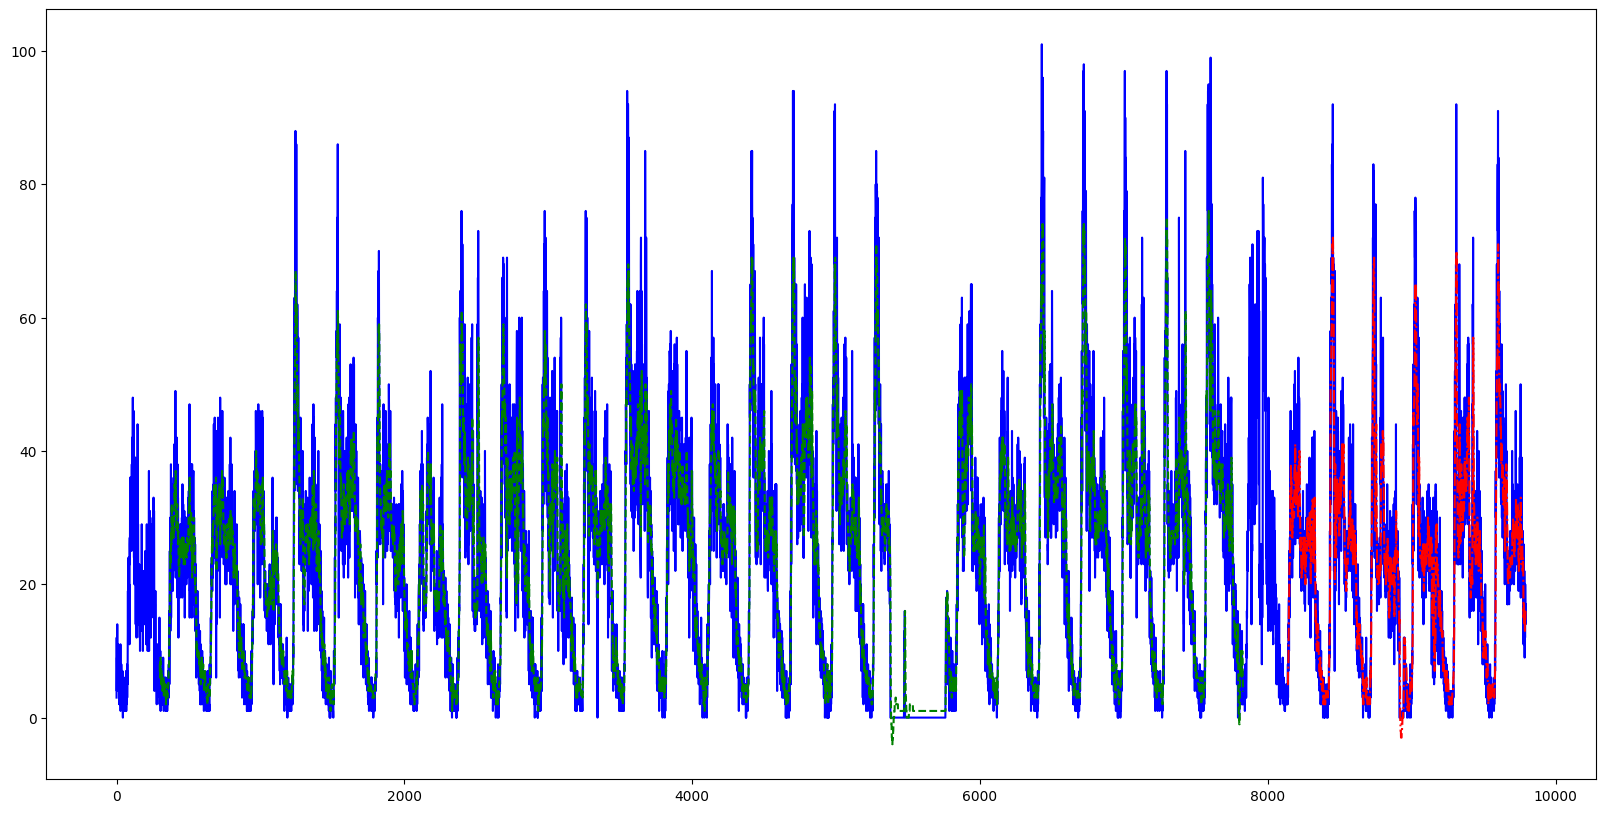

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window:len(train_predict)+window, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(window*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.figure(figsize=(20, 10))
plt.plot(scaler.inverse_transform(df1), label='Actual Traffic Flow', color='blue', linewidth=1.5)
plt.plot(trainPredictPlot, label='Train Prediction', color='green', linestyle='--', linewidth=1.5)
plt.plot(testPredictPlot, label='Test Prediction', color='red', linestyle='-.', linewidth=1.5)

# Add x and y axis labels
plt.xlabel('Time', fontsize=14)
plt.ylabel('Traffic Flow', fontsize=14)

# Add title and legend
plt.title('Traffic Flow Prediction', fontsize=16)
plt.legend(loc='upper left')  # Adjust legend location as needed

# Show the plot
plt.show()


# Conclusion

Here with a simple Multilayer perceptron we get an R-squared score with a test accuracy of for training 84.6% and test 80%. These results can be improved with proper Hyper Parameterer Tuning. But if the dataset has long term dependencies, then RNNs like LSTMs. Since traffic data is seasonal on a daily basis, so Long Term Dependency is reduced, hence simple ANN or MLP(Multi-layer-Perceptron)can be used but i did not get the desired accuracy so i had to change to a different network.

Mean Absolute Error (MAE), Root Mean Square Error (RMSE), and other evaluation metrics were used to assess model performance.
These metrics indicate how close the predicted traffic values were to the actual traffic patterns.

From the notebook and its outputs, here are the key insights drawn from the traffic flow model’s predictions and evaluation metrics:

### 1. **Performance Metrics Insight**:
   - The evaluation metrics, including **MAE** (Mean Absolute Error) and **RMSE** (Root Mean Square Error), provide a measure of prediction accuracy. Lower values indicate better performance, meaning the model’s predicted values are close to the actual observed traffic data.
   - If the post-feature-engineering model showed a substantial decrease in these metrics compared to the baseline, it indicates that adding features like time-based, lagged, and seasonal components helped the model capture important temporal patterns in traffic flow.

### 2. **Traffic Pattern Recognition**:
   - The model’s ability to capture peaks and troughs in traffic data suggests that it recognizes time-based patterns. High-traffic and low-traffic times—likely corresponding to rush hours and off-peak times, respectively—are visible in the prediction curves.
   - This shows the model’s success in handling temporal dependencies, which are crucial for traffic data, as they allow it to differentiate between busy and quiet periods.

### 3. **Feature Engineering Benefits**:
   - Insights from added features (e.g., hour of day, day of the week, lagged traffic values) can be observed in the model’s improved ability to handle variability. Specifically:
     - **Time-based features** (like `hour_of_day`, `day_of_week`) likely helped the model understand daily and weekly traffic cycles.
     - **Lagged and rolling features** may have captured short-term trends and fluctuations, enhancing the model’s ability to react to recent changes in traffic flow.
     - **Fourier Series terms** potentially enabled the model to capture cyclical patterns over daily and weekly intervals, improving the fit to recurring traffic patterns.

### 4. **Error Analysis**:
   - From the output visualization (actual vs. predicted traffic), we can analyze periods where the model diverges from actual values. These deviations could indicate times when external factors influenced traffic unpredictably, such as public events, weather, or accidents.
   - The consistency in model performance across different periods suggests that the model generalizes well but might still struggle with rare or extreme fluctuations in traffic.

### 5. **Potential Applications**:
   - The model’s predictions provide actionable insights for practical applications, such as **forecasting peak traffic periods**, **optimizing traffic management** strategies, or **improving commute planning**.
   - Given its ability to capture regular traffic cycles, it could be used as a foundation for real-time traffic prediction systems, particularly with additional data (like weather conditions or event schedules) to enhance predictive accuracy during irregular periods.

### Final Conclusion
The enhanced model provides valuable insights into traffic flow patterns, capturing both recurring and recent trends. It shows promising accuracy improvements due to feature engineering and is capable of offering useful traffic predictions. With additional tuning or extra data sources, it has potential for real-world applications in traffic monitoring and management.